# Lab 07 - Introduction to the Oscilloscope (Make-Up Lab Version)

Edit this cell and provide the information requested:

- Your name: Mary Hosseini
- Your student number: 41004235

In [113]:
%reset -f 
import numpy as np
import data_entry2
import matplotlib.pyplot as plt

## Part A - FAMILIARIZE, Part 1 - Overview of your resistor-capacitor (RC) circuit and the oscilloscope tutorial

#### Learning Goals
- Use an oscilloscope to perform voltage measurements- 
Use a scatter plot, residuals plot, and chi-squared to inform improvements and draw conclusion

#### Experimental Question
Determine the capacitance of a capacitor being used in a Resistor-Capacitor circuit by measuring the time constant of the capacitor’s voltage decay curv

#### Video One Notes
- Experimental goal mentioned in the video: determine the capacitance of a capacitor being used in a Resistor-Capacitor circuit by measuring the time constant of the capacitor's voltage decay curve
- Oscilloscope used to measure the capacitor
- An oscilloscope is a tool to measure voltage as a function of time. The graphing calculator version of a multimeter
- When you close the switch, it charges up the capacitor. When you open the switch, the capacitor discharges through the resistor, making a current.
- The more you zoom in on an oscilloscope, the finer measurement of time you will get eg. milliseconds...

## Part B - Make an initial set of measurements

#### Uncertainty Time
If we move the time cursor by one "Fine" movement, we will see a decrease or increase in the cursor value by 4 microseconds. We know that the uncertainty of time is rectangular. Therefore, we can say that the uncertainty of time equals $\frac{4 \times 10^{-6}}{\sqrt{3}}= 0.0000023094 = 2.31 \times 10^{-6}$

#### Uncertainty Voltage
If we move the voltage cursors by one fine movement, we will see a decrease or increase in the cursor value by 4 microvolts. We know that the uncertainty of voltage is Gaussian. Since $4+ 4=8$. we can say that the uncertainty of voltage equals $8mV/4= 2mV = 0.002V$

In [114]:
de1 = data_entry2.sheet("lab07_data")

Sheet name: lab07_data.csv


## Part C - MEASURE & ANALYZE - Create a scatter plot

In [115]:
# tau
# 1: difference in time between points
deltat = t2Vec - t1Vec 
# 2: ratio of voltage
W = V1Vec / V2Vec 
# 3: taking the logarithm 
lnW = np.log(W) 
# 4: calculating the time constant
tau = deltat / lnW 

# utau
# 1: propagation of u[deltaT]
udeltat = np.sqrt( ut1Vec**2 + ut2Vec**2 ) 
# 2: propagation of u[W]
uW = W * np.sqrt( (uV1Vec/V1Vec)**2 + (uV2Vec/V2Vec)**2 ) 
# 3: propagation of u[lnW]
ulnW = uW / W  # correct this equation
# 4: propagation of u[deltaT/lnW] to get u[tau]
utau = tau * np.sqrt( (udeltat / deltat)**2 + (ulnW / lnW)**2)  # correct this equation

print("u[tau] =",utau, "s")
print("tau =",tau, "s")
print("Relative uncertainty u[tau]/tau = ",utau/tau)

u[tau] = [3.72893594e-06 4.81275973e-06 4.61340992e-06 5.45916856e-06] s
tau = [0.00039005 0.00048994 0.00058283 0.00067015] s
Relative uncertainty u[tau]/tau =  [0.00956018 0.00982307 0.00791547 0.00814621]


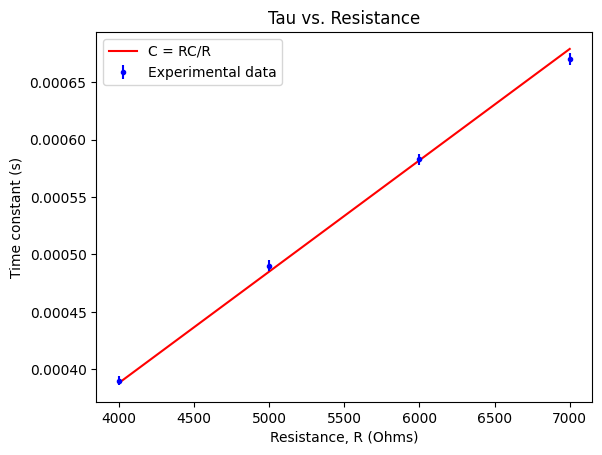

Weighted chi-squared:  1.3397155474684537


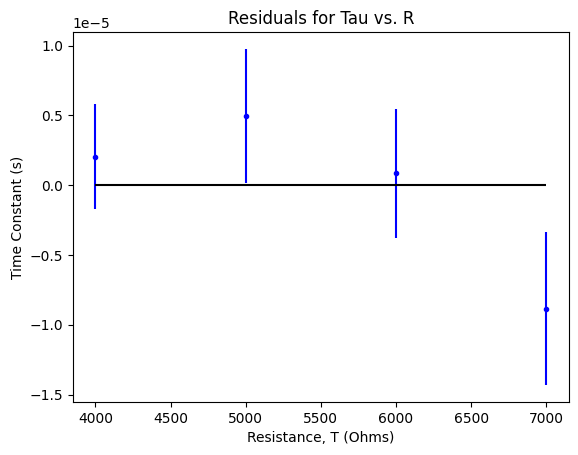

In [116]:
# Scatter Plot
# 1: find the limits of the data:
xmin = np.min(RVec) 
xmax = np.max(RVec)

# 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 100) 

# 3: calculate the model values:
slope = 0.000000097 # Initial estimate of the slope
ypoints = xpoints * slope 

# 4: plot the curve
plt.plot(xpoints, ypoints, "r-", label = "C = RC/R")

# 5: plot the data
plt.errorbar(RVec, tau, utau, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Tau vs. Resistance")
plt.xlabel("Resistance, R (Ohms)")
plt.ylabel("Time constant (s)")
plt.legend()
plt.show()

# Residuals plot
# Residuals step 1: Calculate the model at each x-datapoint
ymodel = slope * RVec # y = mx at each x_i

# Residuals step 2: Calculate the residual vector
R_Vec = tau - ymodel

# Calculate chi-squared
chi2 = np.sum((R_Vec/utau)**2)/(len(R_Vec)-1)
print("Weighted chi-squared: ", chi2)

# Resoduals step 3: Plot the residual vector against the x-data vector
plt.errorbar(RVec, R_Vec, utau, fmt="bo", markersize = 3)


# Residuals step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Residuals step 5: Add axis labels and title, and show the graph
plt.title("Residuals for Tau vs. R")
plt.xlabel("Resistance, T (Ohms)")
plt.ylabel("Time Constant (s)")
plt.show()

In [117]:
# slope and u[slope]
slope_max = 0.000000098
slope_min = 0.000000095
slope_best = 0.000000097
u_slope = (slope_max-slope_min)/2
print("The model slope is with 68% confidence interval: {:.8f}+/-{:.9f} F".format(slope_best, u_slope)) 
# capacitance and u_capacitance
capacitance = slope_best
u_capacitance = u_slope
print( "The calculated capacitance is: ", capacitance)
print( "The calculated uncertainty in capacitance is: ", u_capacitance) 

The model slope is with 68% confidence interval: 0.00000010+/-0.000000002 F
The calculated capacitance is:  9.7e-08
The calculated uncertainty in capacitance is:  1.5000000000000002e-09


## Part D - COMPARE, SUMMARIZE, REFLECT

#### Comparison of Expected Value of Capacitance Vs My Value of Capacitance
Since the lab instruction mentioned no t-score calculations, I will only go over the results from the calculations. The expected value of capacitance for this lab was $1.0 \times 10^{-7}F$. My calculation also show that I got a number very similar to the expected value of capacitance, $9.7 \times 10^{-8}F$. The difference between my value and the expected value of capacitance is very small: $3.0 \times 10^{-9}F$.

#### Results From the calculations
Based on my calculation the value of the capacitance is $9.7 \times 10^{-8}F$, with an uncertainty of $3.0 \times 10^{-9}F$. From eyeballing the slope on the plot, I got a Weighted Chi-squared value of 1.3 with the final best slope being $1.0 \times 10^{-7}$ +/- $2.0 \times 10^{-8}F$. 

#### Possible paths for improving the quality of your overall data set and for improving your analysis approach. 
Eyeballing the slope is a tedious and time-consuming task. For future labs, a possible improvement could be to find some formulas or calculations that can help calculate the slope of the model instead of continuously guessing the value of the slope. Implementing this change can help achieve more accurate results. Another way to improve the quality of your overall data set and for improving your analysis approach is to gather more data, having more data points available helps ensure accuracy in the results of the calculations. Using these two improvement methods, we can make it so that we have greater confidence in your measurement of the slope.

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and Export_Notebook_As->HTML
4. Upload the HTML document to the lab submission assignment on Canvas.

In [118]:
display_sheets()

Sheet: de1   File: lab07_data.csv


,R,t1,ut1,t2,ut2,V1,uV1,V2,uV2
Units,ohm,s,s,s,s,V,V,V,V
0,4000,-100E-6,2.31E-6,400E-6,2.31E-6,0.836,0.002,0.232,0.002
1,5000,-100E-6,2.31E-6,400E-6,2.31E-6,0.788,0.002,0.284,0.002
2,6000,-200E-6,2.31E-6,500E-6,2.31E-6,0.904,0.002,0.272,0.002
3,7000,-200E-6,2.31E-6,500E-6,2.31E-6,0.864,0.002,0.304,0.002
